In [226]:
import numpy as np
import pandas as pd
import scipy as sp
import gdown
from sklearn import model_selection
from sklearn import linear_model
import sklearn as sk
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Carga de datos

In [57]:
url ="https://drive.google.com/uc?id=1SWi40MiA42N-t6imiARJNWHNoQqrY00n&export=download"
output = "/content/nyc.xlsx"
gdown.download(url,output,quiet=True)

'/content/nyc.xlsx'

In [3]:
df = pd.read_excel("nyc.xlsx")
df

,Barrio,Distrito,Año,eactual,fventa,Unidades_res,Unidades_com,Precio,Fecha
0,ALPHABET CITY,Manhattan,1900,FIVE TO SIX FAMILIES,Clase 2,5,0,6625000,2017-07-19
1,ALPHABET CITY,Manhattan,1900,WALK-UP APT. OVER SIX FAMILIES WITH STORES,Clase 2,28,3,5550000,2016-12-14
2,ALPHABET CITY,Manhattan,1900,WALK-UP APT. OVER SIX FAMILIES WITH STORES,Clase 2,16,1,5550000,2016-12-09
3,ALPHABET CITY,Manhattan,1910,OLD LAW TENEMENT,Clase 2,10,0,3936272,2016-09-23
4,ALPHABET CITY,Manhattan,1900,FIVE TO SIX FAMILIES,Clase 2,6,0,8000000,2016-11-17
...,...,...,...,...,...,...,...,...,...
84543,WOODROW,Staten Island,1990,MISCELLANEOUS TWO FAMILY,Clase 1,2,0,450000,2016-11-28
84544,WOODROW,Staten Island,1990,MISCELLANEOUS TWO FAMILY,Clase 1,2,0,550000,2017-04-21
84545,WOODROW,Staten Island,1920,TWO FAMILY FRAME,Clase 1,2,0,460000,2017-07-05
84546,WOODROW,Staten Island,2000,SHOPPING CENTER WITH OR WITHOUT PARKING,Clase 4,0,7,11693337,2016-12-21


# Modelado

## Preparación de los datos

In [4]:
#@title R2 Ajustado

def r2_ajustado(real,predichos,n,k):
  ponderacion = (n-1)/(n-k-1)
  return 1 - ponderacion*(1 - sk.metrics.r2_score(real,predichos))

In [408]:
df.columns

Index(['Barrio', 'Distrito', 'Año', 'eactual', 'fventa', 'Unidades_res',
       'Unidades_com', 'Precio', 'Fecha'],
      dtype='object')

In [429]:
df_modelo = pd.get_dummies(df[["Distrito","fventa"]],drop_first=True)
df_modelo

,Distrito_Brooklyn,Distrito_Manhattan,Distrito_Queens,Distrito_Staten Island,fventa_Clase 2,fventa_Clase 3,fventa_Clase 4
0,False,True,False,False,True,False,False
1,False,True,False,False,True,False,False
2,False,True,False,False,True,False,False
3,False,True,False,False,True,False,False
4,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...
84543,False,False,False,True,False,False,False
84544,False,False,False,True,False,False,False
84545,False,False,False,True,False,False,False
84546,False,False,False,True,False,False,True


In [430]:
df_modelo['tiene_condominio'] = df['eactual'].str.contains('condo', case=False)
df_modelo['tiene_elevador'] = df['eactual'].str.contains('elevator', case=False)
df_modelo['familiar'] = df['eactual'].str.contains('famil', case=False)

In [432]:
df_modelo["Año"] = df["Año"]
df_modelo['Fecha'] = (df['Fecha'] - min(df["Fecha"])).dt.days
df_modelo["Precio"] = df["Precio"]
df_modelo

,Distrito_Brooklyn,Distrito_Manhattan,Distrito_Queens,Distrito_Staten Island,fventa_Clase 2,fventa_Clase 3,fventa_Clase 4,tiene_condominio,tiene_elevador,familiar,Año,Fecha,Precio
0,False,True,False,False,True,False,False,False,False,True,1900,321,6625000
1,False,True,False,False,True,False,False,False,False,True,1900,104,5550000
2,False,True,False,False,True,False,False,False,False,True,1900,99,5550000
3,False,True,False,False,True,False,False,False,False,False,1910,22,3936272
4,False,True,False,False,True,False,False,False,False,True,1900,77,8000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,False,False,False,True,False,False,False,False,False,True,1990,88,450000
84544,False,False,False,True,False,False,False,False,False,True,1990,232,550000
84545,False,False,False,True,False,False,False,False,False,True,1920,307,460000
84546,False,False,False,True,False,False,True,False,False,False,2000,111,11693337


In [433]:
x_entr,x_test,y_entr,y_test = model_selection.train_test_split(df_modelo.iloc[:,:-1],df_modelo.iloc[:,-1],test_size=0.2,random_state=40)

# Modelo

## Modelo sklearn

In [434]:
modelo = linear_model.LinearRegression()

In [435]:
modelo.fit(x_entr,np.log(y_entr+0.00005))

LinearRegression()

In [436]:
predicciones=modelo.predict(x_test)

In [437]:
sk.metrics.mean_squared_error(np.log(y_test+0.00005),predicciones)

45.39037726277422

In [438]:
sk.metrics.mean_absolute_error(np.log(y_test+0.00005),predicciones)

4.587945407326024

In [439]:
sk.metrics.r2_score(np.log(y_test+0.00005),predicciones)

0.2470073712918427

In [440]:
r2_ajustado(np.log(y_test+0.00005),predicciones,x_test.shape[0],x_test.shape[1])

0.24647260704111795

In [441]:
modelo.coef_

array([-1.42532813e+00,  5.72343678e+00,  5.86508753e+00,  5.93161837e+00,
        3.27434027e-01, -1.06446416e+01, -3.06475189e+00,  1.00531668e+00,
        1.11989590e+00, -6.10238620e-01, -4.30494962e-03,  2.26454014e-03])

## Modelo stats

In [442]:
x_entr_sm = sm.add_constant(x_entr.values)

In [443]:
modelo = sm.OLS(np.log(y_entr.values+0.00005),x_entr_sm.astype(float))

In [444]:
modelo.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     1849.
Date:                Fri, 17 May 2024   Prob (F-statistic):               0.00
Time:                        06:48:49   Log-Likelihood:            -2.2473e+05
No. Observations:               67638   AIC:                         4.495e+05
Df Residuals:                   67625   BIC:                         4.496e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.6394      1.761      8.313      0.000      11.188      18.091
x1            -1.4253      0.102    -13.927      0.000      -1.626      -1.225
x2             5.7234      0.114     50.140      0.000       5.500       5.947
x3             5.8651      0.101     57.897      0.000       5.667       6.064
x4             5.9316      0.126     47.091      0.000       5.685       6.179
x5             0.3274      0.090      3.625      0.000       0.150       0.504
x6           -10.6446      3.875     -2.747      0.006     -18.240      -3.049
x7            -3.0648      0.120    -25.537      0.000      -3.300      -2.830
x8             1.0053      0.083     12.062      0.000       0.842       1.169
x9             1.1199      0.093     12.075      0.000       0.938       1.302
x10           -0.6102      0.074     -8.294      0.000      -0.754      -0.466
x11           -0.0043      0.001     -4.727      0.000      -0.006      -0.003
x12            0.0023      0.000      9.082      0.000       0.002       0.003
==============================================================================
Omnibus:                     8768.081   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12653.563
Skew:                          -0.995   Prob(JB):                         0.00
Kurtosis:                       3.725   Cond. No.                     2.94e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.94e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: >

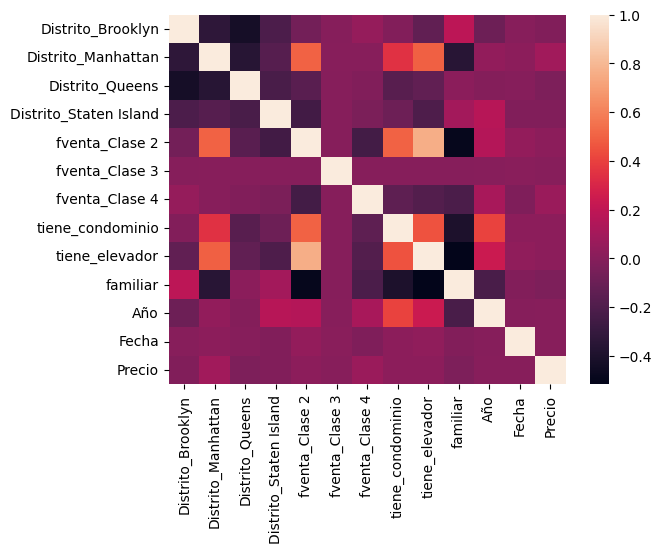

In [445]:
import seaborn as sns
sns.heatmap(df_modelo.corr())

In [446]:
coeficientes = pd.DataFrame({"Variable":list(df_modelo.columns)[:-1],"Coeficiente":np.round(modelo.coef_,4)})
coeficientes

AttributeError: 'OLS' object has no attribute 'coef_'